# importing Requier modules 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

we should load the data at first

In [2]:
# train data
train_data = pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# test data
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml
1,2,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
2,3,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
3,4,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
4,5,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal


droping all nan values

In [4]:
nan_columns = train_data.columns[train_data.isna().sum()/len(train_data)>0.25]
nan_columns
train_data.drop(columns=nan_columns,inplace=True)
test_data.drop(columns=nan_columns,inplace=True)
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1195,60,RL,80.0,9364,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,3,2010,WD,Normal,158000
1195,1196,60,RL,51.0,8029,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2008,WD,Normal,176000
1196,1197,60,RL,58.0,14054,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2006,New,Partial,219210
1197,1198,75,RM,65.0,8850,Pave,IR1,Bnk,AllPub,Corner,...,330,0,0,0,0,7,2006,ConLw,Normal,144000


In [5]:
# we didnt need for the id columns 
train_data.drop(columns = ['Id'] , inplace = True)
test_data.drop(columns = ['Id'] , inplace = True)
train_data
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,71.0,9353,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2006,Oth,Abnorml
1,60,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,0,3,2009,WD,Normal
2,50,RM,50.0,6000,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,208,0,0,0,0,5,2009,WD,Normal
3,20,RL,75.0,9750,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,234,0,0,0,0,0,10,2009,WD,Normal
4,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,88,0,0,0,0,0,7,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
256,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
257,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
258,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


lets categorical the data 

In [6]:
train_data.dtypes
train_data.dtypes == 'object'

MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition     True
SalePrice        False
Length: 75, dtype: bool

In [7]:
Categorical_data = (train_data.dtypes == 'object')
categorical_columns=train_data.columns[Categorical_data]
len(categorical_columns)

38

In [8]:
cat_train_data = train_data[categorical_columns]
cat_test_data = test_data[categorical_columns]
cat_test_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,Oth,Abnorml
1,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
256,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
257,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
258,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [9]:
cat_train_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1195,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1196,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,BuiltIn,Fin,TA,TA,Y,New,Partial
1197,RM,Pave,IR1,Bnk,AllPub,Corner,Gtl,OldTown,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,ConLw,Normal


In [10]:
cat_train_data = tf.keras.utils.to_categorical(cat_train_data, num_classes=38)
cat_test_data = tf.keras.utils.to_categorical(cat_test_data, num_classes=38)

ValueError: invalid literal for int() with base 10: 'RL'

In [11]:
dummies_data_train=pd.get_dummies(cat_train_data)
dummies_data_test=pd.get_dummies(cat_test_data)
dummies_data_test = dummies_data_test.reindex(columns = dummies_data_train.columns, fill_value=0)
dummies_data_test

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
256,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
257,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
258,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
train_data.drop(columns=categorical_columns, inplace=True)
test_data.drop(columns=categorical_columns, inplace=True)

In [14]:
h_p=train_data["SalePrice"].values
train_data.drop(columns=["SalePrice"],inplace=True)

In [15]:
train_data.fillna(train_data.mean(),inplace=True)#filling with mean
test_data.fillna(test_data.mean(),inplace=True)#filling with mean

In [16]:
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,60,80.0,9364,6,7,1969,1969,143.0,371,0,...,299,379,36,0,0,0,0,0,3,2010
1195,60,51.0,8029,6,5,2005,2005,0.0,0,0,...,400,100,24,0,0,0,0,0,7,2008
1196,60,58.0,14054,7,5,2006,2006,0.0,0,0,...,660,100,17,0,0,0,0,0,11,2006
1197,75,65.0,8850,7,6,1916,1950,0.0,0,0,...,225,0,0,330,0,0,0,0,7,2006


In [17]:
dummies_data_train

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1195,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1196,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1197,0,0,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [18]:
train_data=pd.concat([train_data,dummies_data_train],axis=1)
test_data=pd.concat([test_data,dummies_data_test],axis=1)
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,60,80.0,9364,6,7,1969,1969,143.0,371,0,...,0,0,0,1,0,0,0,0,1,0
1195,60,51.0,8029,6,5,2005,2005,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1196,60,58.0,14054,7,5,2006,2006,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
1197,75,65.0,8850,7,6,1916,1950,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [19]:
# normalizing 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

In [20]:
max_price=max(h_p)
h_price=h_p/max_price

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,h_price,test_size = 0.33 , random_state = 10 )

In [22]:
print('the train size is : ' , X_train.shape[0] , y_train.shape[0])
print('the test size is : ' , X_test.shape[0] , y_test.shape[0])
print('the train and set between' , np.max(X_train) , np.max(X_test))
X_train.shape

the train size is :  803 803
the test size is :  396 396
the train and set between 34.61213659975357 34.61213659975357


(803, 262)

In [25]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation

In [35]:
model = tf.keras.Sequential()
model.add(Dense(150, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
    # Compile model
model.compile(optimizer="adam", loss = 'binary_crossentropy')
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               39450     
                                                                 
 dense_7 (Dense)             (None, 200)               30200     
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dense_9 (Dense)             (None, 64)                6464      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 98,327
Trainable params: 98,327
Non-trai

In [36]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    verbose = 2

)

Epoch 1/100
26/26 - 71s - loss: 0.9505 - val_loss: 0.6059 - 71s/epoch - 3s/step
Epoch 2/100
26/26 - 0s - loss: 0.5838 - val_loss: 0.6466 - 174ms/epoch - 7ms/step
Epoch 3/100
26/26 - 0s - loss: 0.5614 - val_loss: 0.6614 - 189ms/epoch - 7ms/step
Epoch 4/100
26/26 - 0s - loss: 0.5799 - val_loss: 0.5490 - 161ms/epoch - 6ms/step
Epoch 5/100
26/26 - 0s - loss: 0.5503 - val_loss: 0.5398 - 179ms/epoch - 7ms/step
Epoch 6/100
26/26 - 0s - loss: 0.5495 - val_loss: 0.5413 - 168ms/epoch - 6ms/step
Epoch 7/100
26/26 - 0s - loss: 0.5468 - val_loss: 0.5348 - 177ms/epoch - 7ms/step
Epoch 8/100
26/26 - 0s - loss: 0.5428 - val_loss: 0.5350 - 165ms/epoch - 6ms/step
Epoch 9/100
26/26 - 0s - loss: 0.5413 - val_loss: 0.5337 - 171ms/epoch - 7ms/step
Epoch 10/100
26/26 - 0s - loss: 0.5403 - val_loss: 0.5339 - 191ms/epoch - 7ms/step
Epoch 11/100
26/26 - 0s - loss: 0.5398 - val_loss: 0.5336 - 229ms/epoch - 9ms/step
Epoch 12/100
26/26 - 0s - loss: 0.5395 - val_loss: 0.5332 - 249ms/epoch - 10ms/step
Epoch 13/100
2

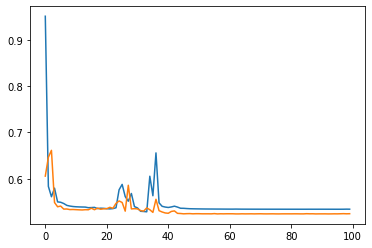

In [37]:
train_loss=history.history["loss"]
val_loss=history.history["val_loss"]
Epochs = range(len(train_loss))
plt.plot(Epochs,train_loss,
        Epochs, val_loss)

In [38]:
test_predict=model.predict(test_data)
test_pre_values=test_predict*max_price

9/9 [==============================] - 8s 3ms/step


In [42]:
test_data_2 = pd.read_csv('test.csv')
test_data_2["SalePrice"] = test_pre_values
test_data_2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml,167723.889723
1,2,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,212065.573186
2,3,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,128403.013125
3,4,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,219451.332986
4,5,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,137702.000737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,170179.486945
256,257,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,162110.581771
257,258,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,276356.120855
258,259,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,126866.706684


In [43]:
test_data_2.to_csv("Tested.csv")